# Analisis de Dataset

In [1]:
# Integrantes
# Danny Jaramillo
# Danny Vasquez
# Angel Minga

In [2]:
import statsmodels.formula.api as sfm #Biblioteca para estimar modelos estadísticos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix #Herramienta de Pandas para diagramas de dispersió

In [3]:
# Lectura de los archivos
df = pd.read_csv('tips_datos.csv',sep=',',quotechar='"')
df_Female = pd.read_csv('tips_dato_F.csv',sep=',',quotechar='"')
df_Male = pd.read_csv('tips_dato_M.csv',sep=',',quotechar='"')

In [4]:
df.head()

total_bill   tip     sex smoker  day    time  size  genero  fuma  dia  \
0       16.99  1.01  Female     No  Sun  Dinner     2       0     0    1   
1       10.34  1.66    Male     No  Sun  Dinner     3       1     0    1   
2       21.01  3.50    Male     No  Sun  Dinner     3       1     0    1   
3       23.68  3.31    Male     No  Sun  Dinner     2       1     0    1   
4       24.59  3.61  Female     No  Sun  Dinner     4       0     0    1   

   tiempo  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
df.describe()

total_bill         tip        size      genero        fuma         dia  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean    19.785943    2.998279    2.569672    0.643443    0.381148    2.098361   
std      8.902412    1.383638    0.951100    0.479967    0.486667    0.933244   
min      3.070000    1.000000    1.000000    0.000000    0.000000    1.000000   
25%     13.347500    2.000000    2.000000    0.000000    0.000000    1.000000   
50%     17.795000    2.900000    2.000000    1.000000    0.000000    2.000000   
75%     24.127500    3.562500    3.000000    1.000000    1.000000    3.000000   
max     50.810000   10.000000    6.000000    1.000000    1.000000    4.000000   

           tiempo  
count  244.000000  
mean     0.278689  
std      0.449276  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

# Numero total de propinas

In [6]:
totalProp=df['tip'].count()

In [7]:
totalProp

244

# Sumatoria de las propinas

In [8]:
sum_propina=round(df['tip'].sum(),2)

In [9]:
sum_propina

731.58

# Frecuencia Absoluta

In [10]:
#Obtener informacion de la frecuncia absoluta como una serie de datos
freqAbs=df['tip'].value_counts().to_frame()

In [11]:
freqAbs

tip
2.00   33
3.00   23
4.00   12
5.00   10
2.50   10
...   ...
2.83    1
1.58    1
3.71    1
3.35    1
2.18    1

[123 rows x 1 columns]

# Frecuencia relativa

In [12]:
#funcion para calcular la frecuencia relativa
def freq_relative(x):
    return x/totalProp

In [13]:
freq_relative(freqAbs['tip'])

2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
2.83    0.004098
1.58    0.004098
3.71    0.004098
3.35    0.004098
2.18    0.004098
Name: tip, Length: 123, dtype: float64

# Media de propina

In [14]:
mediaProp= round(sum_propina/totalProp,4)

In [15]:
mediaProp

2.9983

# Relaciòn existe entre propina y factura

In [16]:
# Correlación metodo de pearson
df.corr(method="pearson")

total_bill       tip      size    genero      fuma       dia  \
total_bill    1.000000  0.675734  0.598315  0.144877  0.085721 -0.175312   
tip           0.675734  1.000000  0.489299  0.088862  0.005929 -0.138947   
size          0.598315  0.489299  1.000000  0.086195 -0.133178 -0.211750   
genero        0.144877  0.088862  0.086195  1.000000  0.002816 -0.215374   
fuma          0.085721  0.005929 -0.133178  0.002816  1.000000  0.170818   
dia          -0.175312 -0.138947 -0.211750 -0.215374  0.170818  1.000000   
tiempo       -0.183118 -0.121629 -0.103411 -0.205231 -0.054921  0.670470   

              tiempo  
total_bill -0.183118  
tip        -0.121629  
size       -0.103411  
genero     -0.205231  
fuma       -0.054921  
dia         0.670470  
tiempo      1.000000

In [17]:
# Se puede observar que existe una correlación de 0.655734 entre factura (total_bill) y propina (tip) que es una correlación fuerte

In [18]:
# Correlación metodo de kendall
df.corr(method="kendall")

total_bill       tip      size    genero      fuma       dia  \
total_bill    1.000000  0.517181  0.484342  0.120889  0.050004 -0.153125   
tip           0.517181  1.000000  0.378185  0.046539  0.014119 -0.134164   
size          0.484342  0.378185  1.000000  0.090987 -0.122854 -0.227723   
genero        0.120889  0.046539  0.090987  1.000000  0.002816 -0.204860   
fuma          0.050004  0.014119 -0.122854  0.002816  1.000000  0.141003   
dia          -0.153125 -0.134164 -0.227723 -0.204860  0.141003  1.000000   
tiempo       -0.170303 -0.116622 -0.156301 -0.205231 -0.054921  0.653536   

              tiempo  
total_bill -0.170303  
tip        -0.116622  
size       -0.156301  
genero     -0.205231  
fuma       -0.054921  
dia         0.653536  
tiempo      1.000000

In [19]:
# Se puede observar que existe una correlación de 0.517181 entre factura (total_bill) y propina (tip) que es una correlacion fuerte

In [20]:
# Correlación metodo de spearman
df.corr(method="spearman")

total_bill       tip      size    genero      fuma       dia  \
total_bill    1.000000  0.678968  0.604791  0.147717  0.061101 -0.201559   
tip           0.678968  1.000000  0.468268  0.055982  0.016984 -0.174345   
size          0.604791  0.468268  1.000000  0.096021 -0.129651 -0.257066   
genero        0.147717  0.055982  0.096021  1.000000  0.002816 -0.221169   
fuma          0.061101  0.016984 -0.129651  0.002816  1.000000  0.152228   
dia          -0.201559 -0.174345 -0.257066 -0.221169  0.152228  1.000000   
tiempo       -0.208096 -0.140286 -0.164948 -0.205231 -0.054921  0.705565   

              tiempo  
total_bill -0.208096  
tip        -0.140286  
size       -0.164948  
genero     -0.205231  
fuma       -0.054921  
dia         0.705565  
tiempo      1.000000

In [21]:
# Se puede observar que existe una correlación de 0.678968 entre factura (total_bill) y propina (tip) que e suna correlación fuerte

# Correlación obtenida por la formula de Pearson

# Codigo para pearson

In [22]:
# Calculamos de forma manual el coeficiente de correlación de Pearson mediante una función:
def corr_coeff(dataFrame, var1, var2):
    dataFrame["corrn"] = (dataFrame[var1] - np.mean(dataFrame[var1])) * (dataFrame[var2] - np.mean(dataFrame[var2]))
    dataFrame["corr1"] = (dataFrame[var1] - np.mean(dataFrame[var1])) ** 2
    dataFrame["corr2"] = (dataFrame[var2] - np.mean(dataFrame[var2])) ** 2
    coeficienteCorrelacionPearson = sum(dataFrame["corrn"]) / np.sqrt(sum(dataFrame["corr1"]) * sum(dataFrame["corr2"]))
    return coeficienteCorrelacionPearson

In [23]:
round(corr_coeff(df, "total_bill", "tip"),4)

0.6757

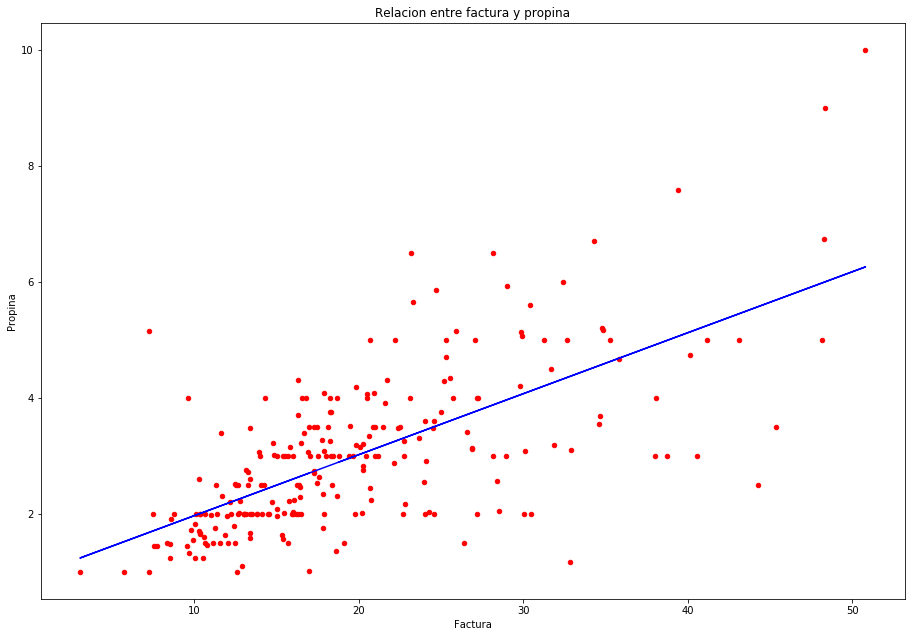

In [24]:
# Pintamos un gráfico de puntos para visualizar la correlación entre la factura y propina 
plt.title("Relacion entre factura y propina")
y = df["tip"] #todos los valores de la variable 
x = df["total_bill"] #todos los valores de la variable 

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.ylabel("Propina")
plt.xlabel("Factura")
plt.plot(x, a * x + b, color="blue")
#plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

# Relación existente entre Propina-factura-genero

# Corelacion Female (Mujer) y Male (Hombres)

In [25]:
# Se separo los datos de las facturas y propinas del dataset para Mujeres y obtener la correlación
df_Female.corr(method="pearson")

total_bill       tip      size  genero      fuma       dia  \
total_bill    1.000000  0.682999  0.651807     NaN -0.007757 -0.228169   
tip           0.682999  1.000000  0.566127     NaN  0.066500 -0.202936   
size          0.651807  0.566127  1.000000     NaN -0.182257 -0.196388   
genero             NaN       NaN       NaN     NaN       NaN       NaN   
fuma         -0.007757  0.066500 -0.182257     NaN  1.000000  0.124692   
dia          -0.228169 -0.202936 -0.196388     NaN  0.124692  1.000000   
tiempo       -0.176976 -0.178336 -0.002312     NaN -0.158254  0.663002   

              tiempo  
total_bill -0.176976  
tip        -0.178336  
size       -0.002312  
genero           NaN  
fuma       -0.158254  
dia         0.663002  
tiempo      1.000000

In [26]:
# Al realizar la correlacion de factura y propina del data set de mujeres se observa que existe una correlacion de 0.682999 que seria una correlacion fuerte que supera el 0.5

In [27]:
# Se separo los datos de las facturas y propinas del dataset para Hombres y obtener la correlación
df_Male.corr(method="pearson")

total_bill       tip      size  genero      fuma       dia  \
total_bill    1.000000  0.669753  0.568810     NaN  0.131444 -0.111096   
tip           0.669753  1.000000  0.455190     NaN -0.020373 -0.089454   
size          0.568810  0.455190  1.000000     NaN -0.107764 -0.199855   
genero             NaN       NaN       NaN     NaN       NaN       NaN   
fuma          0.131444 -0.020373 -0.107764     NaN  1.000000  0.204399   
dia          -0.111096 -0.089454 -0.199855     NaN  0.204399  1.000000   
tiempo       -0.150873 -0.072114 -0.144506     NaN  0.012500  0.653429   

              tiempo  
total_bill -0.150873  
tip        -0.072114  
size       -0.144506  
genero           NaN  
fuma        0.012500  
dia         0.653429  
tiempo      1.000000

In [28]:
# Al realizar la correlacion de factura y propina del data set de Hombres se observa que existe una correlacion de 0.669753 que seria una correlacion fuerte que supera el 0.5

# Obtencion de correlación por la formula antes mensionada de pearson para el dataset de mujer y hombre


In [29]:
round(corr_coeff(df_Female, "total_bill", "tip"),4)

0.683

In [30]:
# Al aplicar la formula para obtener la correlacion con el dataset de mujeres se obtune el mismo valor que se presento anteriormente en el calculo de la correlacion

In [31]:
round(corr_coeff(df_Male, "total_bill", "tip"),4)

0.6698

In [32]:
# Al aplicar la formula para obtener la correlacion con el dataset de hombres se obtune el mismo valor que se presento anteriormente en el calculo de la correlacion

# Grafico de correlación

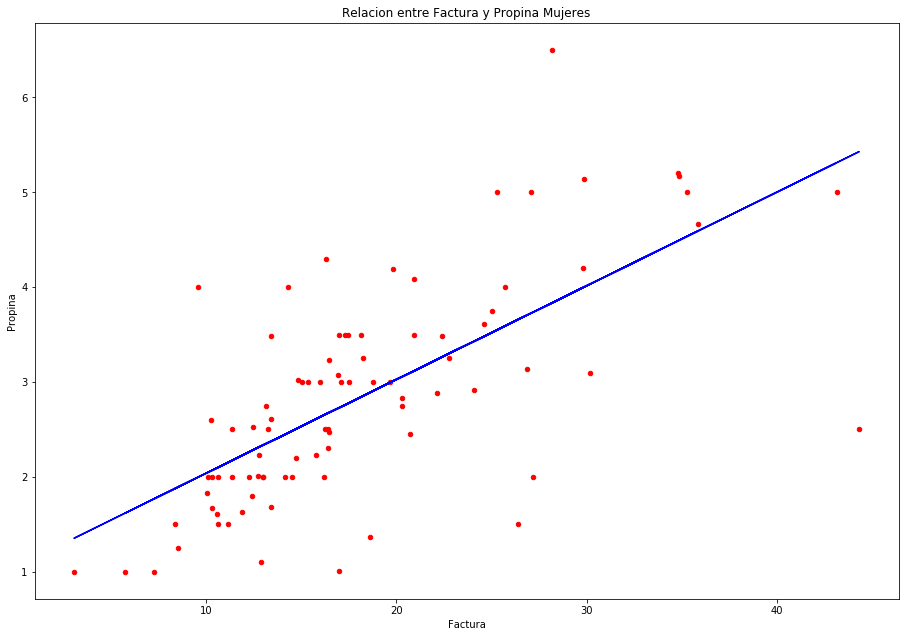

In [33]:
plt.title("Relacion entre Factura y Propina Mujeres")
y = df_Female["tip"] #todos los valores de la variable 
x = df_Female["total_bill"] #todos los valores de la variable 

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.ylabel("Propina")
plt.xlabel("Factura")
plt.plot(x, a * x + b, color="blue")
#plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

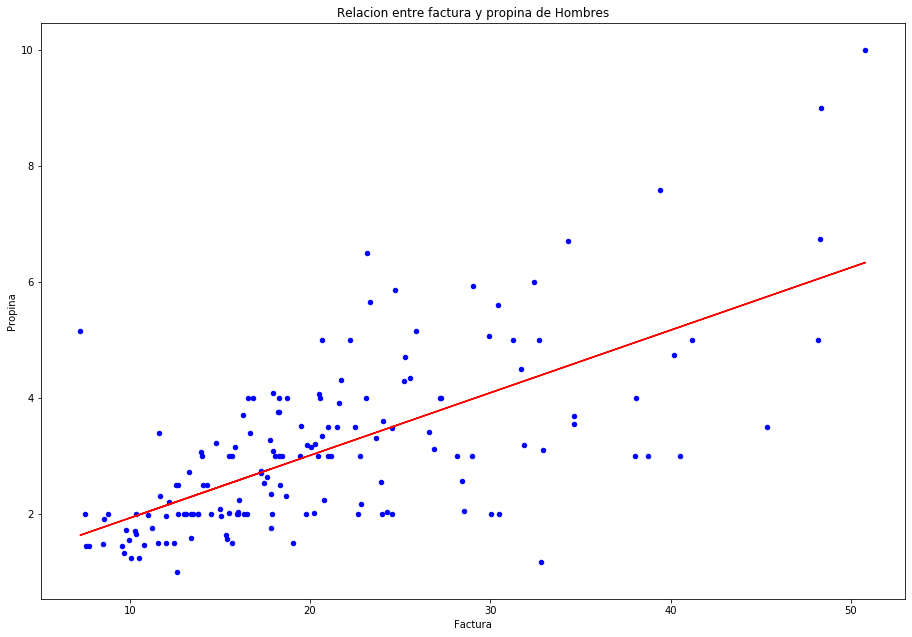

In [34]:
# Pintamos un gráfico de nube de puntos para visualizar la correlación:
plt.title("Relacion entre factura y propina de Hombres")
y = df_Male["tip"] #todos los valores de la variable 
x = df_Male["total_bill"] #todos los valores de la variable 

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="blue", s=20)
plt.ylabel("Propina")
plt.xlabel("Factura")
plt.plot(x, a * x + b, color="red")
#plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()


# Datos de las 3 variables factura, propina y genero

In [35]:
df_2 = df.iloc[:,[0,1,7]] # Dataframe solo con los 3 valres, excluyendo los otros valores.        
df_2.describe().transpose()

count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
genero      244.0   0.643443  0.479967  0.00   0.0000   1.000   1.0000   1.00

# Dataframe con los 3 valores

In [36]:
variables = ["total_bill", "tip", "genero"]
data = df[variables]

In [37]:
data.head()

total_bill   tip  genero
0       16.99  1.01       0
1       10.34  1.66       1
2       21.01  3.50       1
3       23.68  3.31       1
4       24.59  3.61       0

In [38]:
# calculo de la regresion lineal de los 3 valores
lm = sfm.ols(formula="tip~total_bill+genero", data=data).fit()
lm.params #parametros de la ecuación

Intercept     0.933278
total_bill    0.105232
genero       -0.026609
dtype: float64

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           1.18e-32
Time:                        21:25:16   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9333      0.174      5.371      0.000       0.591       1.276
total_bill     0.1052      0.007     14.110      0.000       0.091       0.120
genero        -0.0266      0.138     -0.192      0.848      -0.299       0.246
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         62.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

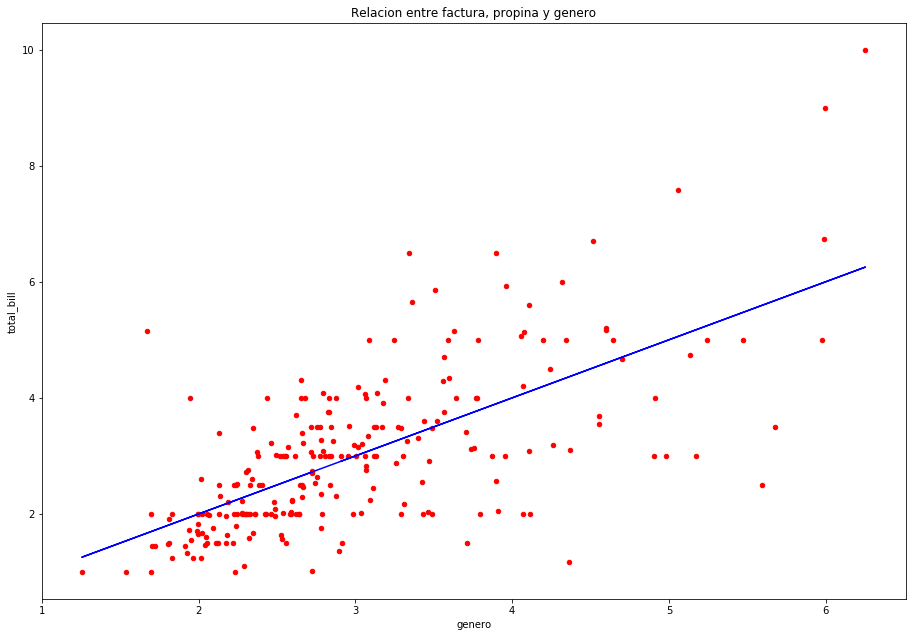

In [40]:
plt.title("Relacion entre factura, propina y genero")
predict = lm.predict(data[["total_bill","genero"]])
data["predict"] = predict

y = data["tip"] #todos los valores de la variable
x = data["predict"] #todos los valores de la variable
#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.ylabel("total_bill")
plt.xlabel("genero")
plt.plot(x, a * x + b, color="blue")
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()